## Validate on CIFAR-10

In [1]:
# dependencies
import numpy as np
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
import torch.optim as optim
import time


from implementation.dropout import Dropout
from utils.tensor_loader import FastTensorDataLoader
from utils.plots import plot_dropout_histories, summarize_metrics, plot_neuron_correlations

np.random.seed(42)
torch.manual_seed(42)

## Loading CIFAR-10 Dataset

In [2]:
# import dataset
train = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor(),
)

test = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor(),
)

train[0][0].shape, train[0][1]

(torch.Size([3, 32, 32]), 6)

In [3]:
train.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

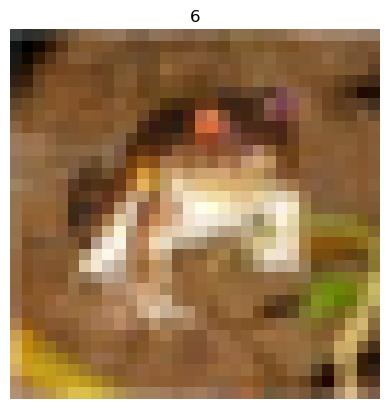

In [4]:
image, label = train[0]
image = image.permute(1, 2, 0)

plt.imshow(image)
plt.title(label)
plt.axis("off")
plt.show()

In [5]:
# create fast dataloaders (avoid using if not enough vram)
train_loader = FastTensorDataLoader(train, shuffle=True)
test_loader = FastTensorDataLoader(test, shuffle=False)

In [6]:
from nn_models.simple import SimpleDropoutNetwork
from nn_models.lenet import DropoutLeNet
from nn_models.vgg import DropoutVGG
from utils.validate import train_and_validate

device = 'cuda' if torch.cuda.is_available() else 'cpu'

dropout_models = [
    SimpleDropoutNetwork,
    DropoutLeNet,
    DropoutVGG
]

dropout_rates = [0.0, 0.2, 0.4, 0.6, 0.8]

results = {}
saved_models = {}

for dropout_model in dropout_models:
    for p in dropout_rates:
        print(f"\nTesting Dropout p={p}")
        model = dropout_model(dropout_rate=p, dropout_mode="standard", input_channels=3, img_size=32).to(device)
        history = train_and_validate(model, train_loader, test_loader, epochs=120, max_norm=3.0)
        try:
            results[model.name][p] = history
            saved_models[model.name][p] = model
        except:
            results[model.name] = {}
            results[model.name][p] = history
            saved_models[model.name] = {}
            saved_models[model.name][p] = model


Testing Dropout p=0.0


Training model 'Simple Dropout Neural Network': 100%|██████████| 120/120 [00:10<00:00, 11.75it/s]


Finished in 10.22s

Testing Dropout p=0.2


Training model 'Simple Dropout Neural Network': 100%|██████████| 120/120 [00:10<00:00, 11.24it/s]


Finished in 10.68s

Testing Dropout p=0.4


Training model 'Simple Dropout Neural Network': 100%|██████████| 120/120 [00:10<00:00, 11.00it/s]


Finished in 10.91s

Testing Dropout p=0.6


Training model 'Simple Dropout Neural Network': 100%|██████████| 120/120 [00:18<00:00,  6.37it/s]


Finished in 18.84s

Testing Dropout p=0.8


Training model 'Simple Dropout Neural Network': 100%|██████████| 120/120 [00:15<00:00,  7.68it/s]


Finished in 15.62s

Testing Dropout p=0.0


Training model 'LeNet Dropout Neural Network': 100%|██████████| 120/120 [00:43<00:00,  2.78it/s]


Finished in 43.23s

Testing Dropout p=0.2


Training model 'LeNet Dropout Neural Network': 100%|██████████| 120/120 [00:53<00:00,  2.26it/s]


Finished in 53.03s

Testing Dropout p=0.4


Training model 'LeNet Dropout Neural Network': 100%|██████████| 120/120 [01:01<00:00,  1.96it/s]


Finished in 61.31s

Testing Dropout p=0.6


Training model 'LeNet Dropout Neural Network': 100%|██████████| 120/120 [01:01<00:00,  1.95it/s]


Finished in 61.61s

Testing Dropout p=0.8


Training model 'LeNet Dropout Neural Network': 100%|██████████| 120/120 [01:01<00:00,  1.95it/s]


Finished in 61.45s

Testing Dropout p=0.0


Training model 'VGG Dropout Neural Network': 100%|██████████| 120/120 [17:35<00:00,  8.79s/it]


Finished in 1055.17s

Testing Dropout p=0.2


Training model 'VGG Dropout Neural Network': 100%|██████████| 120/120 [17:21<00:00,  8.68s/it]


Finished in 1041.40s

Testing Dropout p=0.4


Training model 'VGG Dropout Neural Network': 100%|██████████| 120/120 [13:40<00:00,  6.84s/it]


Finished in 820.40s

Testing Dropout p=0.6


Training model 'VGG Dropout Neural Network': 100%|██████████| 120/120 [17:27<00:00,  8.73s/it]


Finished in 1047.55s

Testing Dropout p=0.8


Training model 'VGG Dropout Neural Network': 100%|██████████| 120/120 [17:33<00:00,  8.78s/it]

Finished in 1053.16s


In [7]:
summarize_metrics(results)

,Model,Dropout Rate,Test Acc (%),F1 Score,Test Loss
5,LeNet Dropout Neural Network,0.0000,62.0000,0.6216,1.1509
6,LeNet Dropout Neural Network,0.2000,64.0800,0.6401,1.0482
7,LeNet Dropout Neural Network,0.4000,64.0900,0.6415,1.0374
8,LeNet Dropout Neural Network,0.6000,60.0200,0.5934,1.1338
9,LeNet Dropout Neural Network,0.8000,46.1100,0.4330,1.4543
0,Simple Dropout Neural Network,0.0000,51.1800,0.5129,1.7829
1,Simple Dropout Neural Network,0.2000,55.7000,0.5549,1.2918
2,Simple Dropout Neural Network,0.4000,53.1200,0.5236,1.3076
3,Simple Dropout Neural Network,0.6000,50.4900,0.4936,1.4017
4,Simple Dropout Neural Network,0.8000,43.2600,0.4116,1.6013


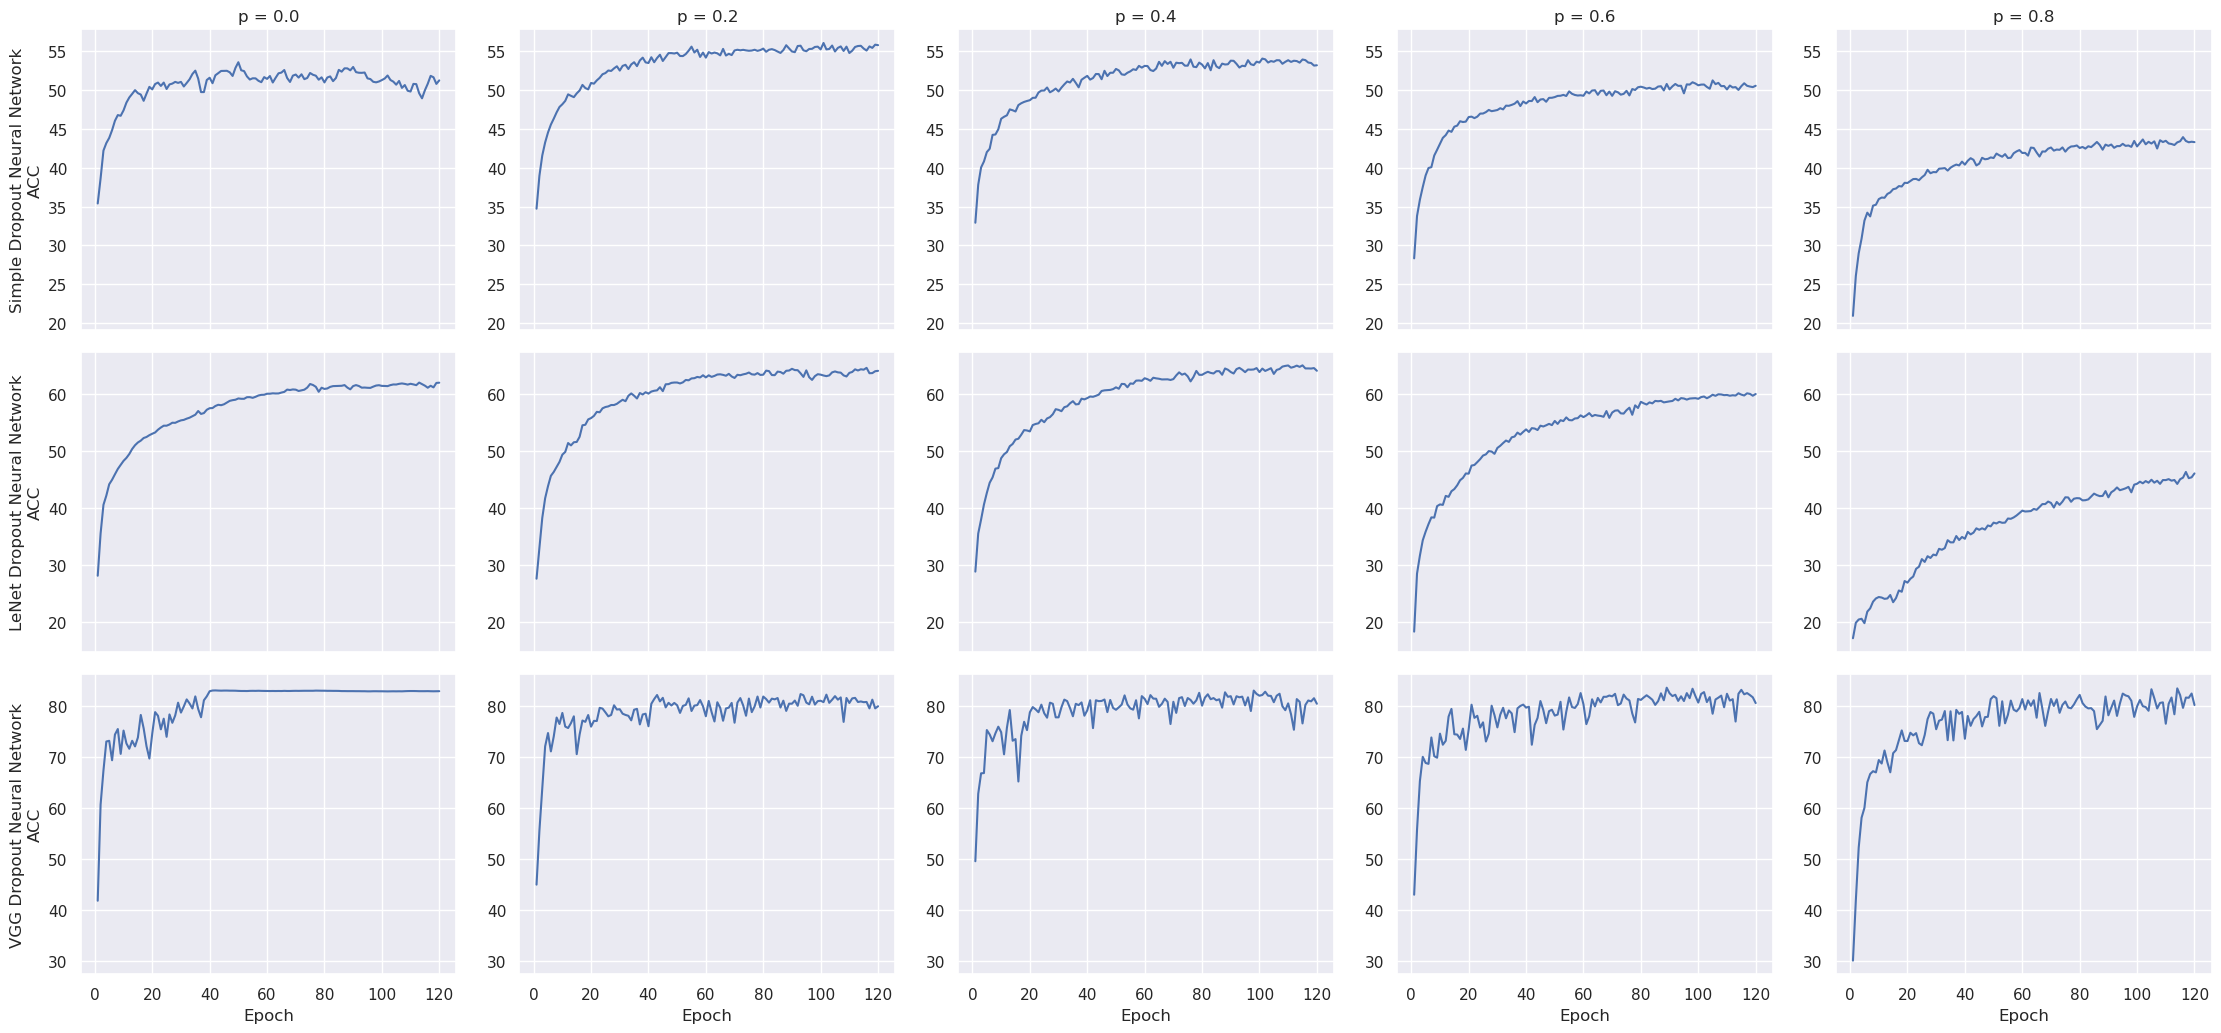

In [8]:
plot_dropout_histories(results, metric="acc")

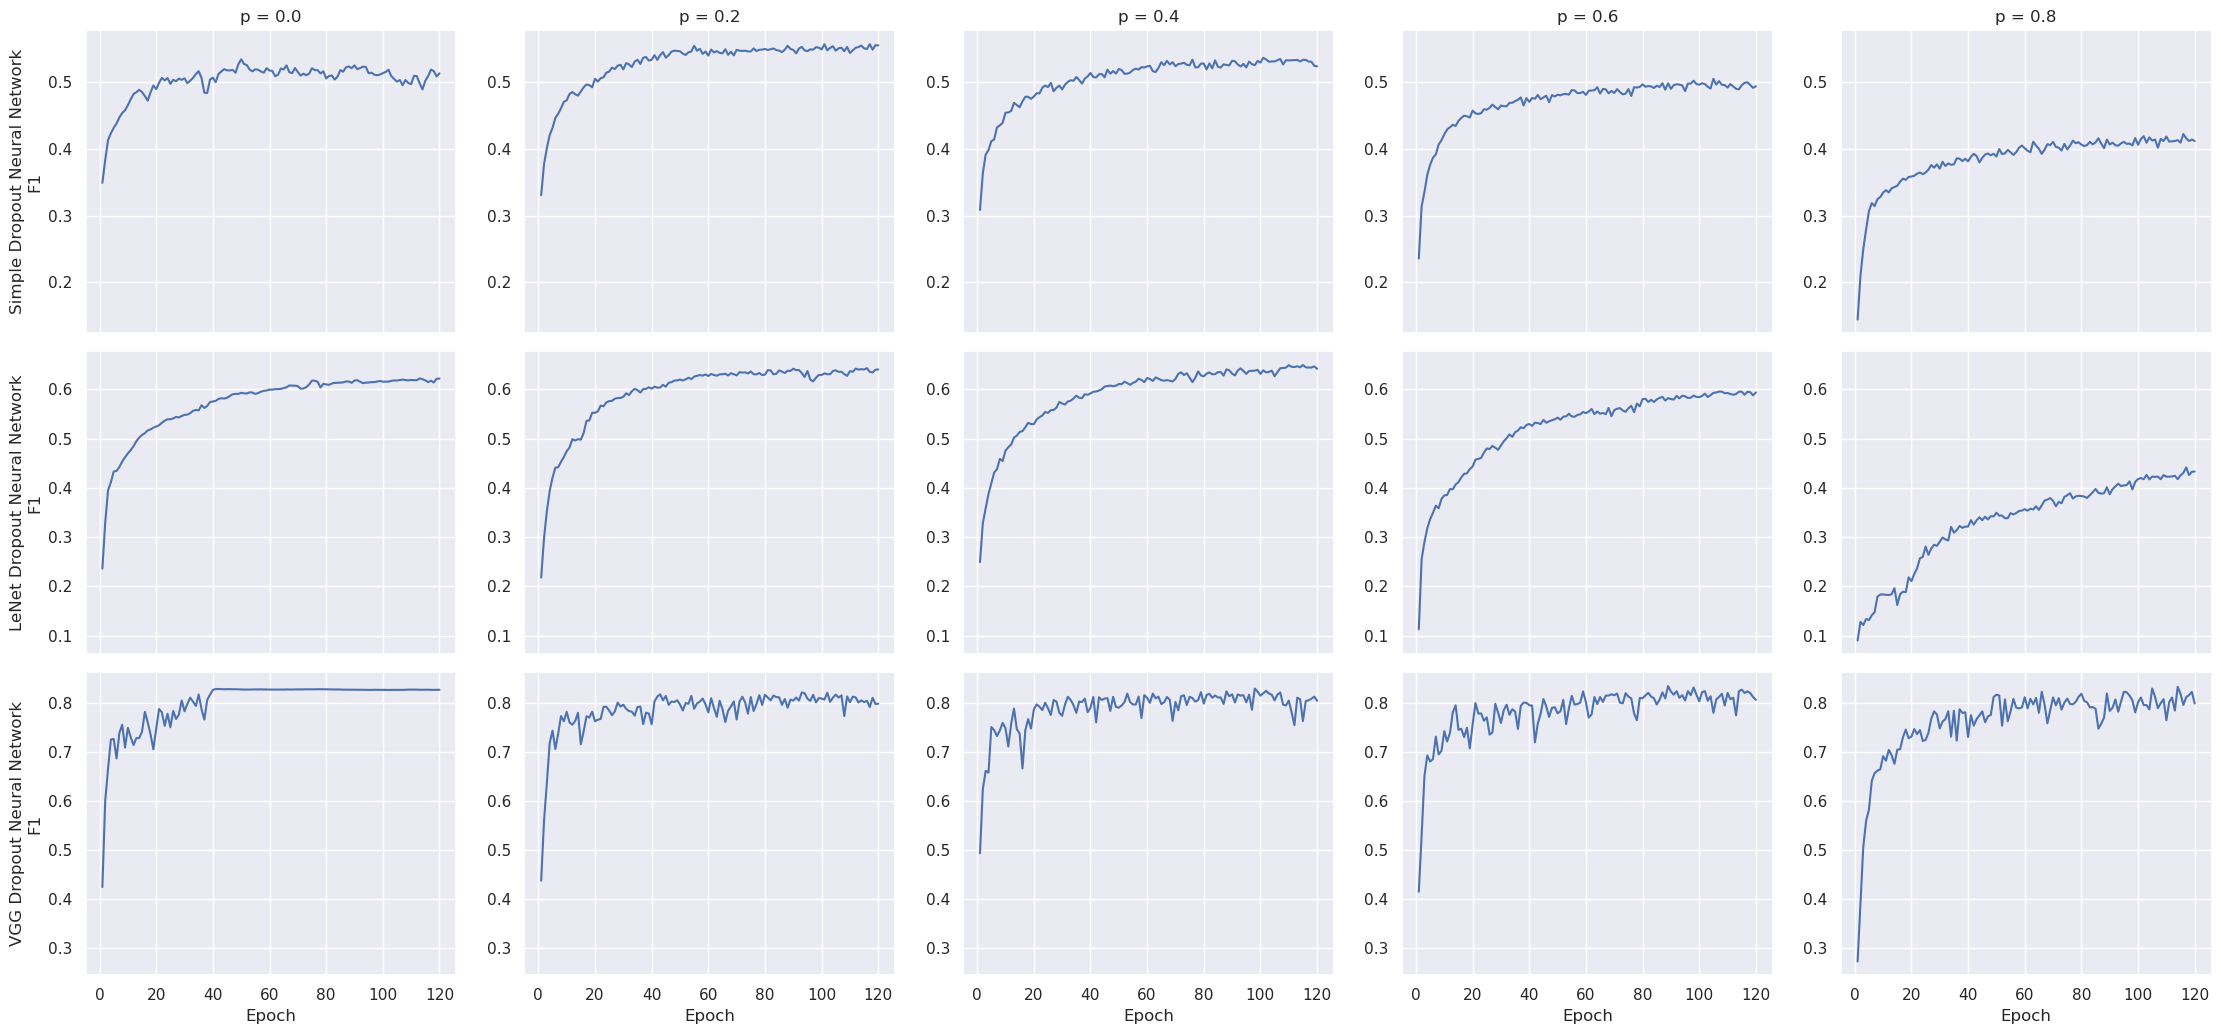

In [9]:
plot_dropout_histories(results, metric="f1")

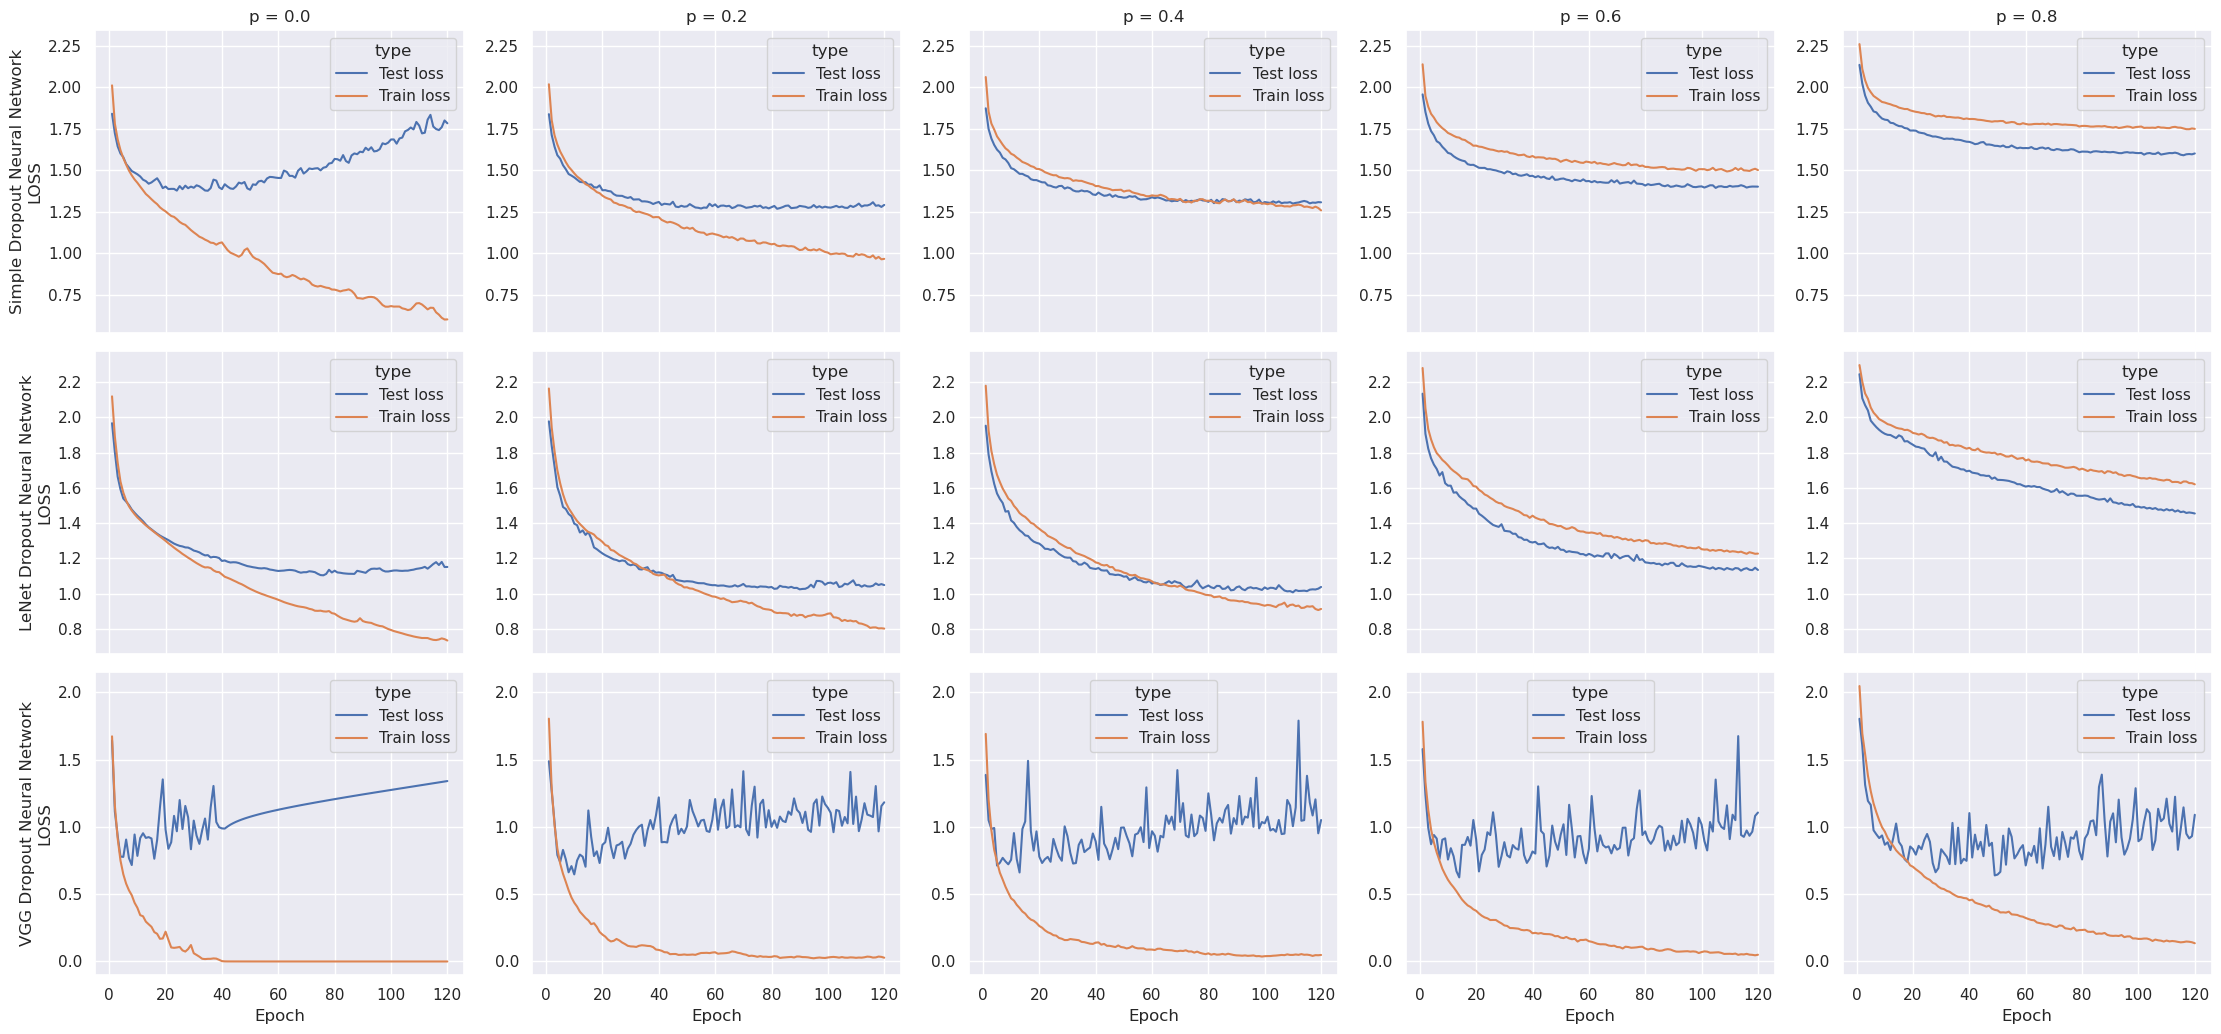

In [10]:
plot_dropout_histories(results, metric="loss")

/home/paulofr/miniforge3/envs/DROPOUT/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/paulofr/miniforge3/envs/DROPOUT/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/paulofr/miniforge3/envs/DROPOUT/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/paulofr/miniforge3/envs/DROPOUT/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/paulofr/miniforge3/envs/DROPOUT/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/paulofr/miniforge3/envs/DROPOUT/lib/python3.10/site-packages/numpy/lib/_function_base_imp

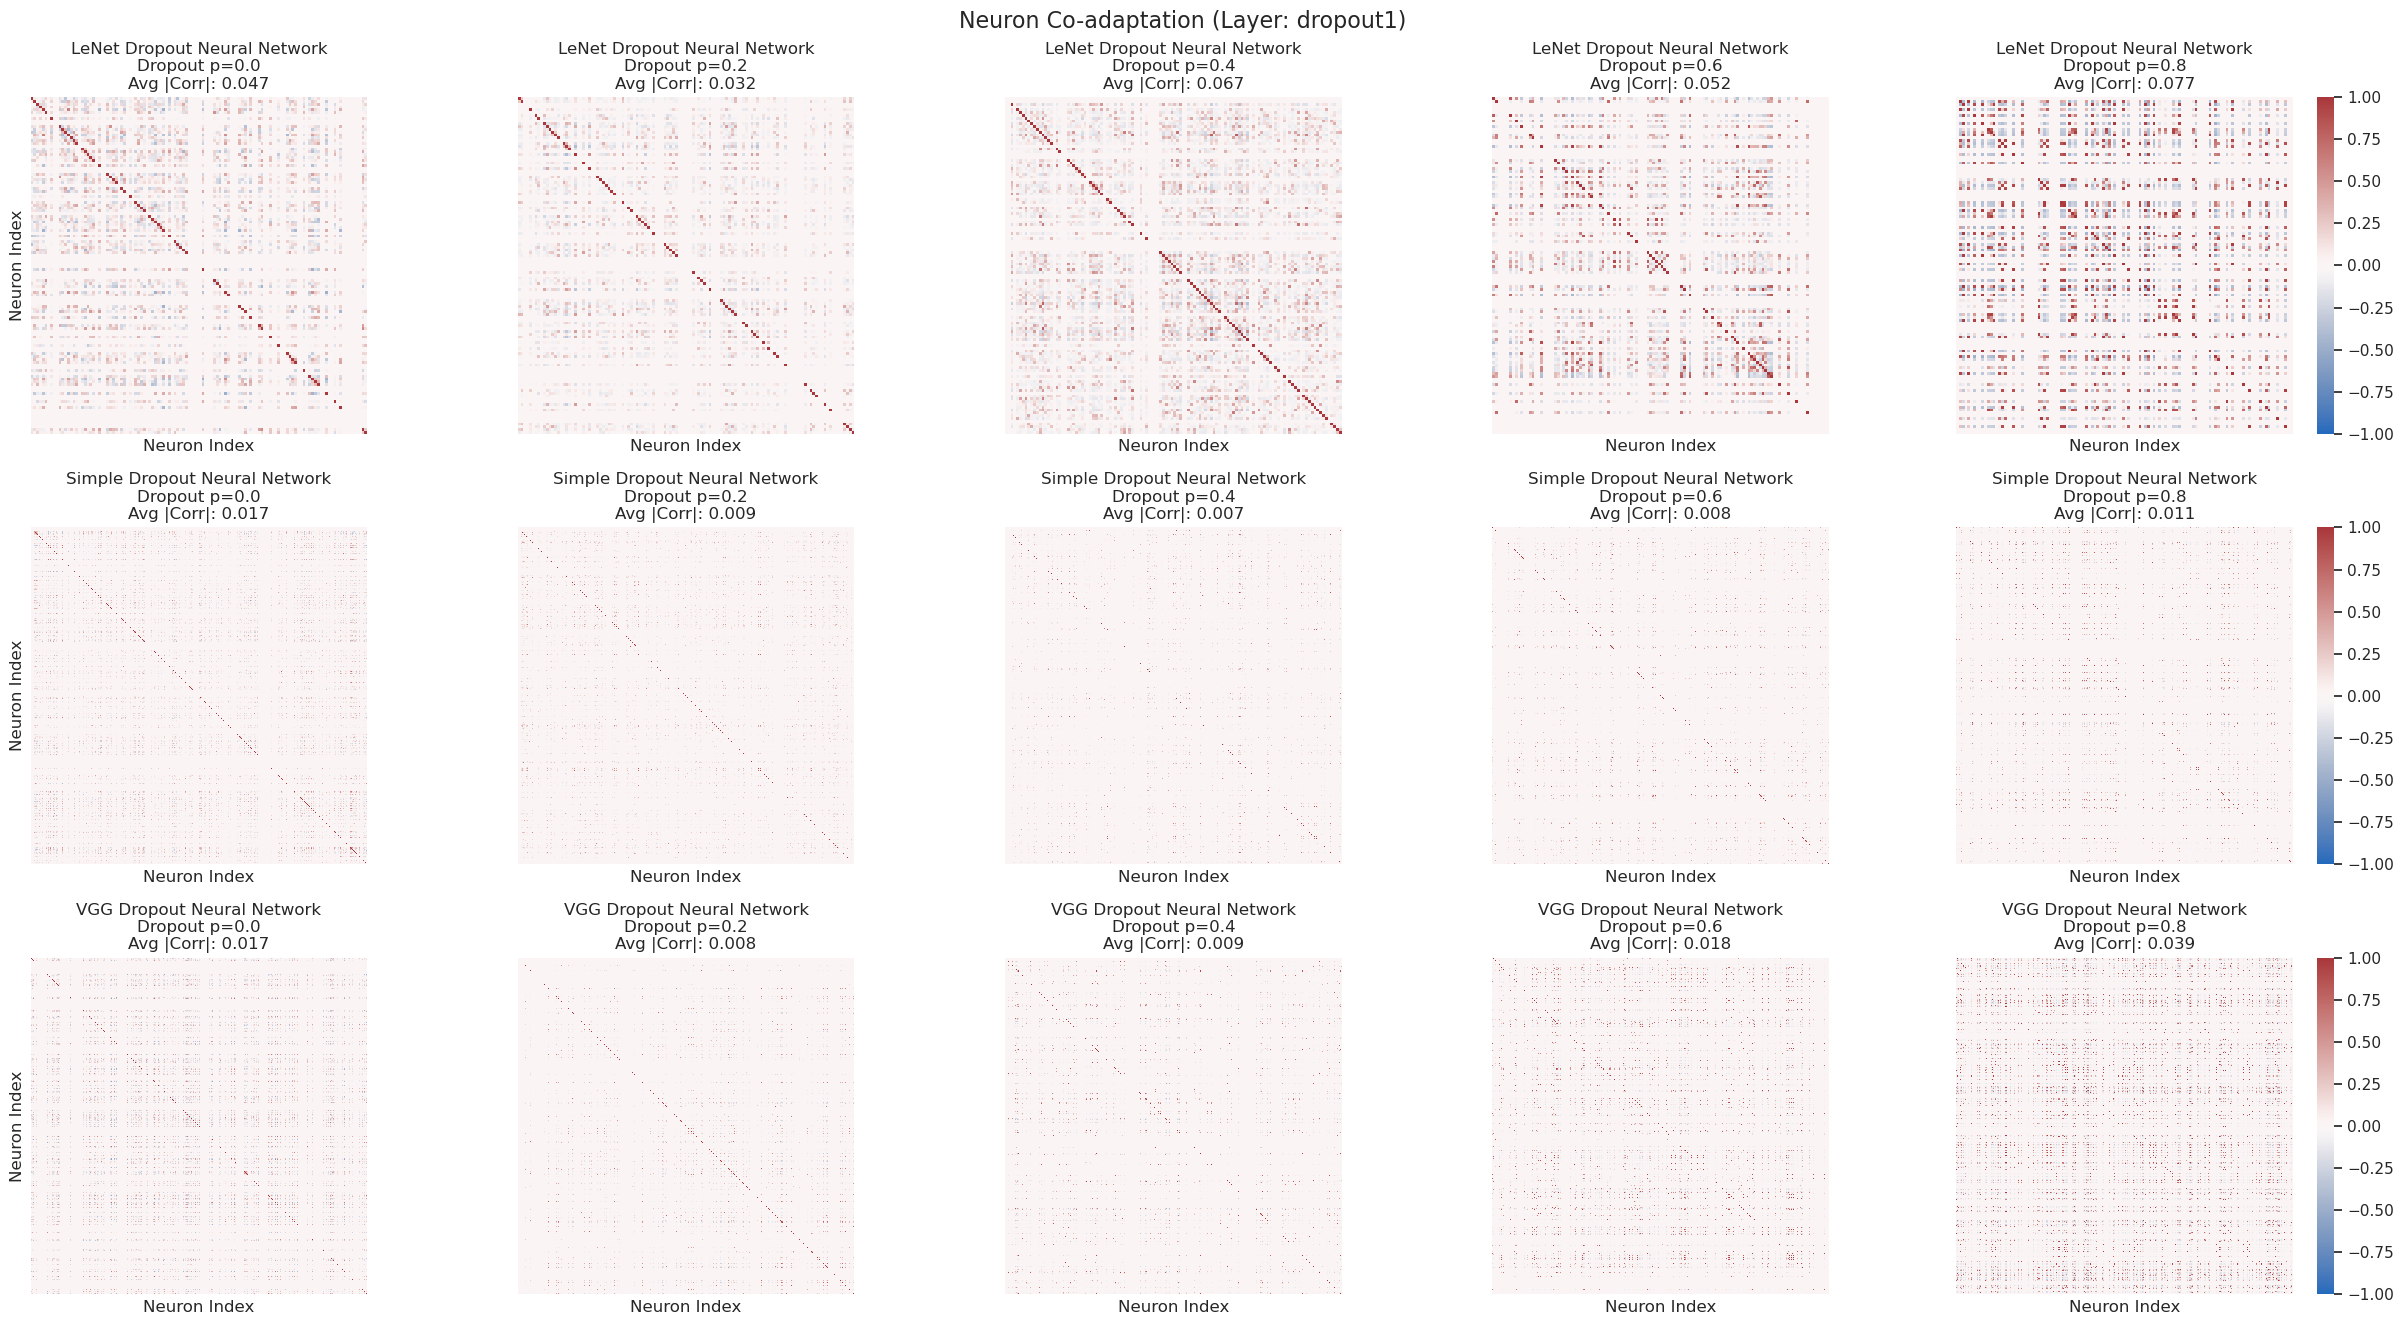

In [11]:
plot_neuron_correlations(saved_models, test_loader, layer_name='dropout1', device=device)

## Testing Subset

In [12]:
len(train)

50000

In [13]:
indices = np.random.choice(len(train), size=1000, replace=False)
train_subset = Subset(train, indices)

train_loader_small = FastTensorDataLoader(train_subset, shuffle=True, batch_size=4096)

In [14]:
results_small = {}

for dropout_model in dropout_models:
    for p in dropout_rates:
        print(f"\nTesting Dropout p={p}")
        model = dropout_model(dropout_rate=p, dropout_mode="inverted", input_channels=3, img_size=32).to(device)
        history = train_and_validate(model, train_loader_small, test_loader, epochs=120, max_norm=3.0)
        try:
            results_small[model.name][p] = history
        except:
            results_small[model.name] = {}
            results_small[model.name][p] = history


Testing Dropout p=0.0


Training model 'Simple Dropout Neural Network': 100%|██████████| 120/120 [00:06<00:00, 18.67it/s]


Finished in 6.43s

Testing Dropout p=0.2


Training model 'Simple Dropout Neural Network': 100%|██████████| 120/120 [00:06<00:00, 18.50it/s]


Finished in 6.49s

Testing Dropout p=0.4


Training model 'Simple Dropout Neural Network': 100%|██████████| 120/120 [00:06<00:00, 18.33it/s]


Finished in 6.55s

Testing Dropout p=0.6


Training model 'Simple Dropout Neural Network': 100%|██████████| 120/120 [00:06<00:00, 18.46it/s]


Finished in 6.50s

Testing Dropout p=0.8


Training model 'Simple Dropout Neural Network': 100%|██████████| 120/120 [00:06<00:00, 18.62it/s]


Finished in 6.45s

Testing Dropout p=0.0


Training model 'LeNet Dropout Neural Network': 100%|██████████| 120/120 [00:08<00:00, 14.01it/s]


Finished in 8.57s

Testing Dropout p=0.2


Training model 'LeNet Dropout Neural Network': 100%|██████████| 120/120 [00:08<00:00, 13.92it/s]


Finished in 8.62s

Testing Dropout p=0.4


Training model 'LeNet Dropout Neural Network': 100%|██████████| 120/120 [00:08<00:00, 13.91it/s]


Finished in 8.63s

Testing Dropout p=0.6


Training model 'LeNet Dropout Neural Network': 100%|██████████| 120/120 [00:09<00:00, 13.31it/s]


Finished in 9.02s

Testing Dropout p=0.8


Training model 'LeNet Dropout Neural Network': 100%|██████████| 120/120 [00:09<00:00, 12.96it/s]


Finished in 9.26s

Testing Dropout p=0.0


Training model 'VGG Dropout Neural Network': 100%|██████████| 120/120 [01:25<00:00,  1.40it/s]


Finished in 85.84s

Testing Dropout p=0.2


Training model 'VGG Dropout Neural Network': 100%|██████████| 120/120 [01:27<00:00,  1.37it/s]


Finished in 87.48s

Testing Dropout p=0.4


Training model 'VGG Dropout Neural Network': 100%|██████████| 120/120 [01:27<00:00,  1.38it/s]


Finished in 87.02s

Testing Dropout p=0.6


Training model 'VGG Dropout Neural Network': 100%|██████████| 120/120 [01:26<00:00,  1.38it/s]


Finished in 86.73s

Testing Dropout p=0.8


Training model 'VGG Dropout Neural Network': 100%|██████████| 120/120 [01:27<00:00,  1.37it/s]

Finished in 87.47s


In [15]:
summarize_metrics(results_small)

,Model,Dropout Rate,Test Acc (%),F1 Score,Test Loss
5,LeNet Dropout Neural Network,0.0000,39.2900,0.3916,1.7619
6,LeNet Dropout Neural Network,0.2000,38.5400,0.3792,1.7238
7,LeNet Dropout Neural Network,0.4000,36.3500,0.3478,1.7625
8,LeNet Dropout Neural Network,0.6000,36.4400,0.3370,1.7331
9,LeNet Dropout Neural Network,0.8000,27.0500,0.2141,1.8865
0,Simple Dropout Neural Network,0.0000,34.0500,0.3364,2.1936
1,Simple Dropout Neural Network,0.2000,35.3800,0.3441,2.3578
2,Simple Dropout Neural Network,0.4000,35.3700,0.3508,2.0959
3,Simple Dropout Neural Network,0.6000,35.1000,0.3445,1.8877
4,Simple Dropout Neural Network,0.8000,27.4200,0.2349,2.0185


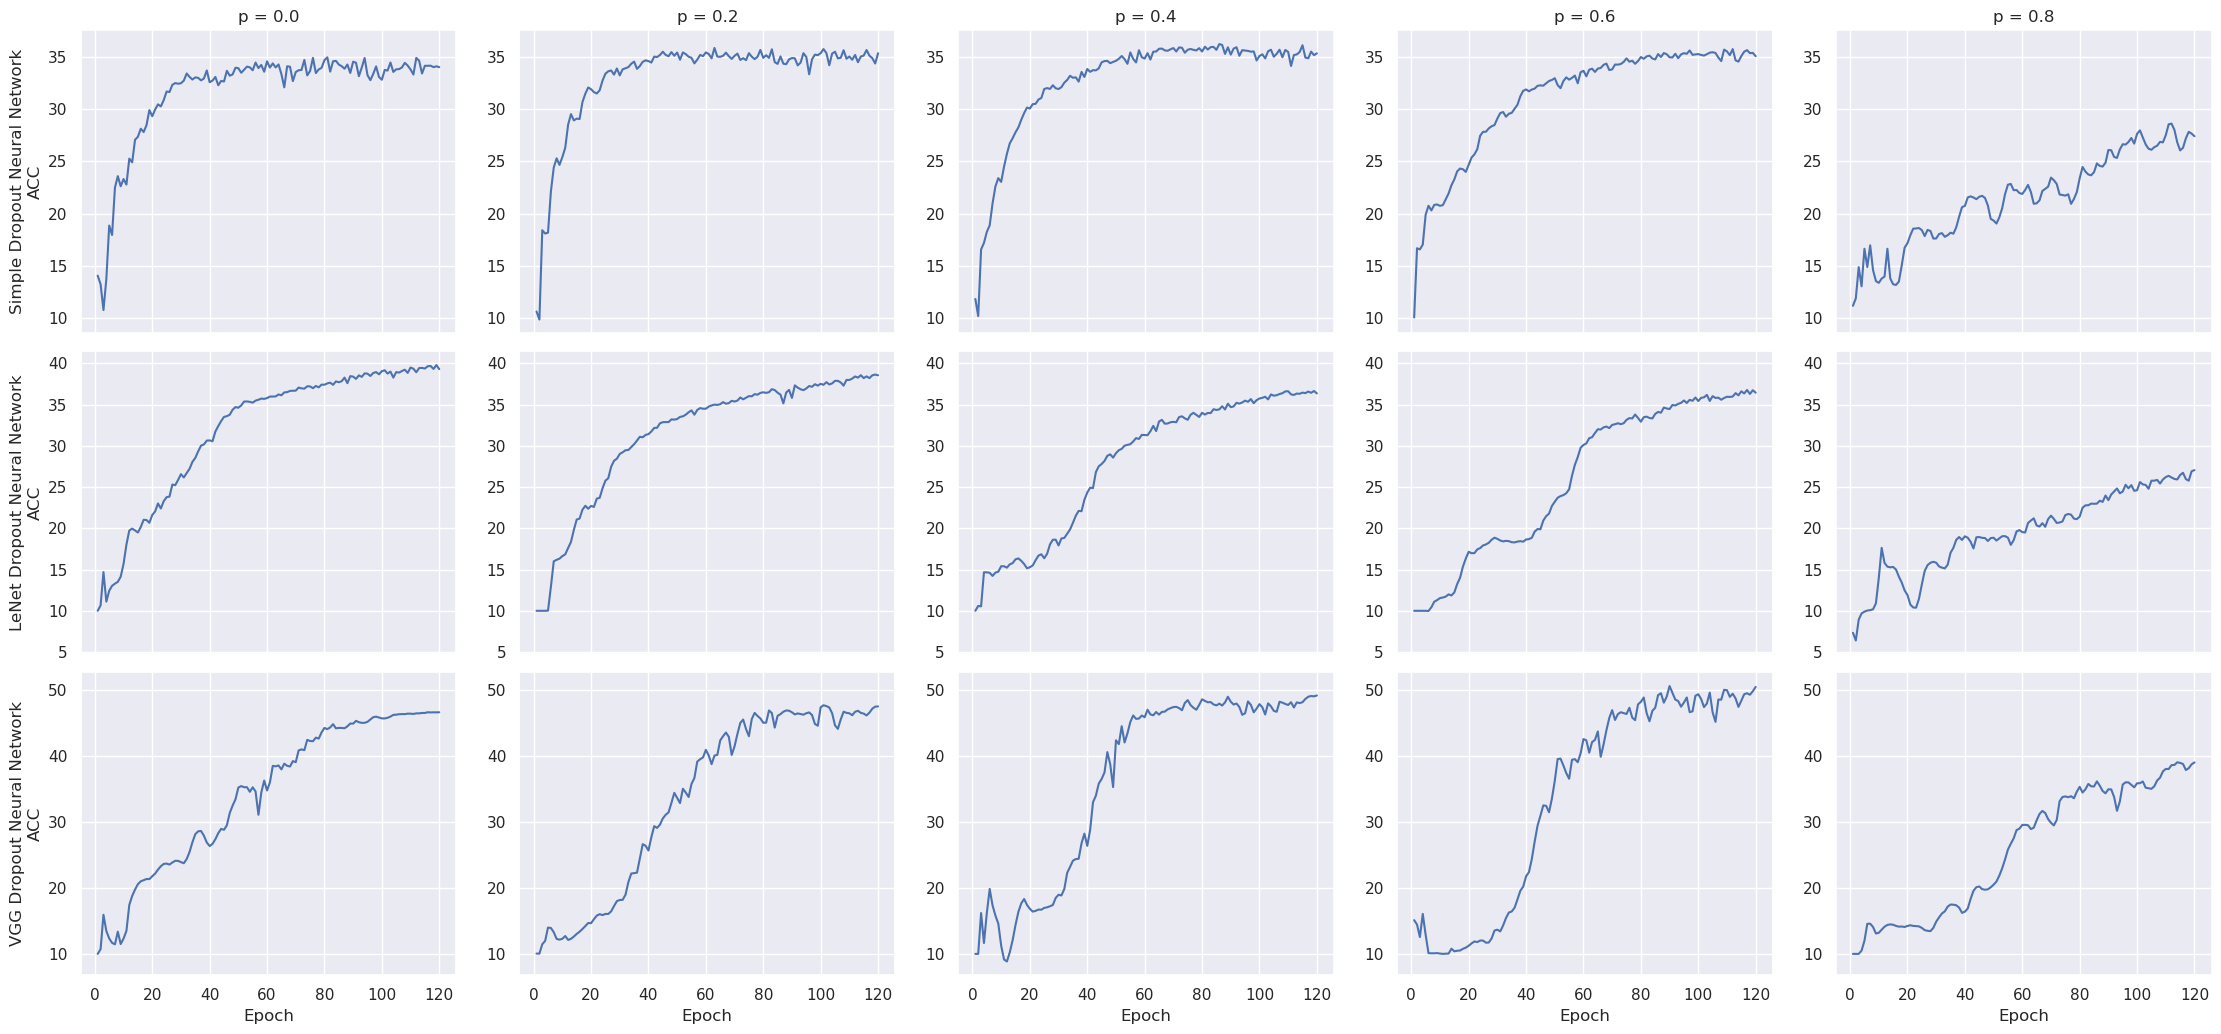

In [16]:
plot_dropout_histories(results_small, metric="acc")

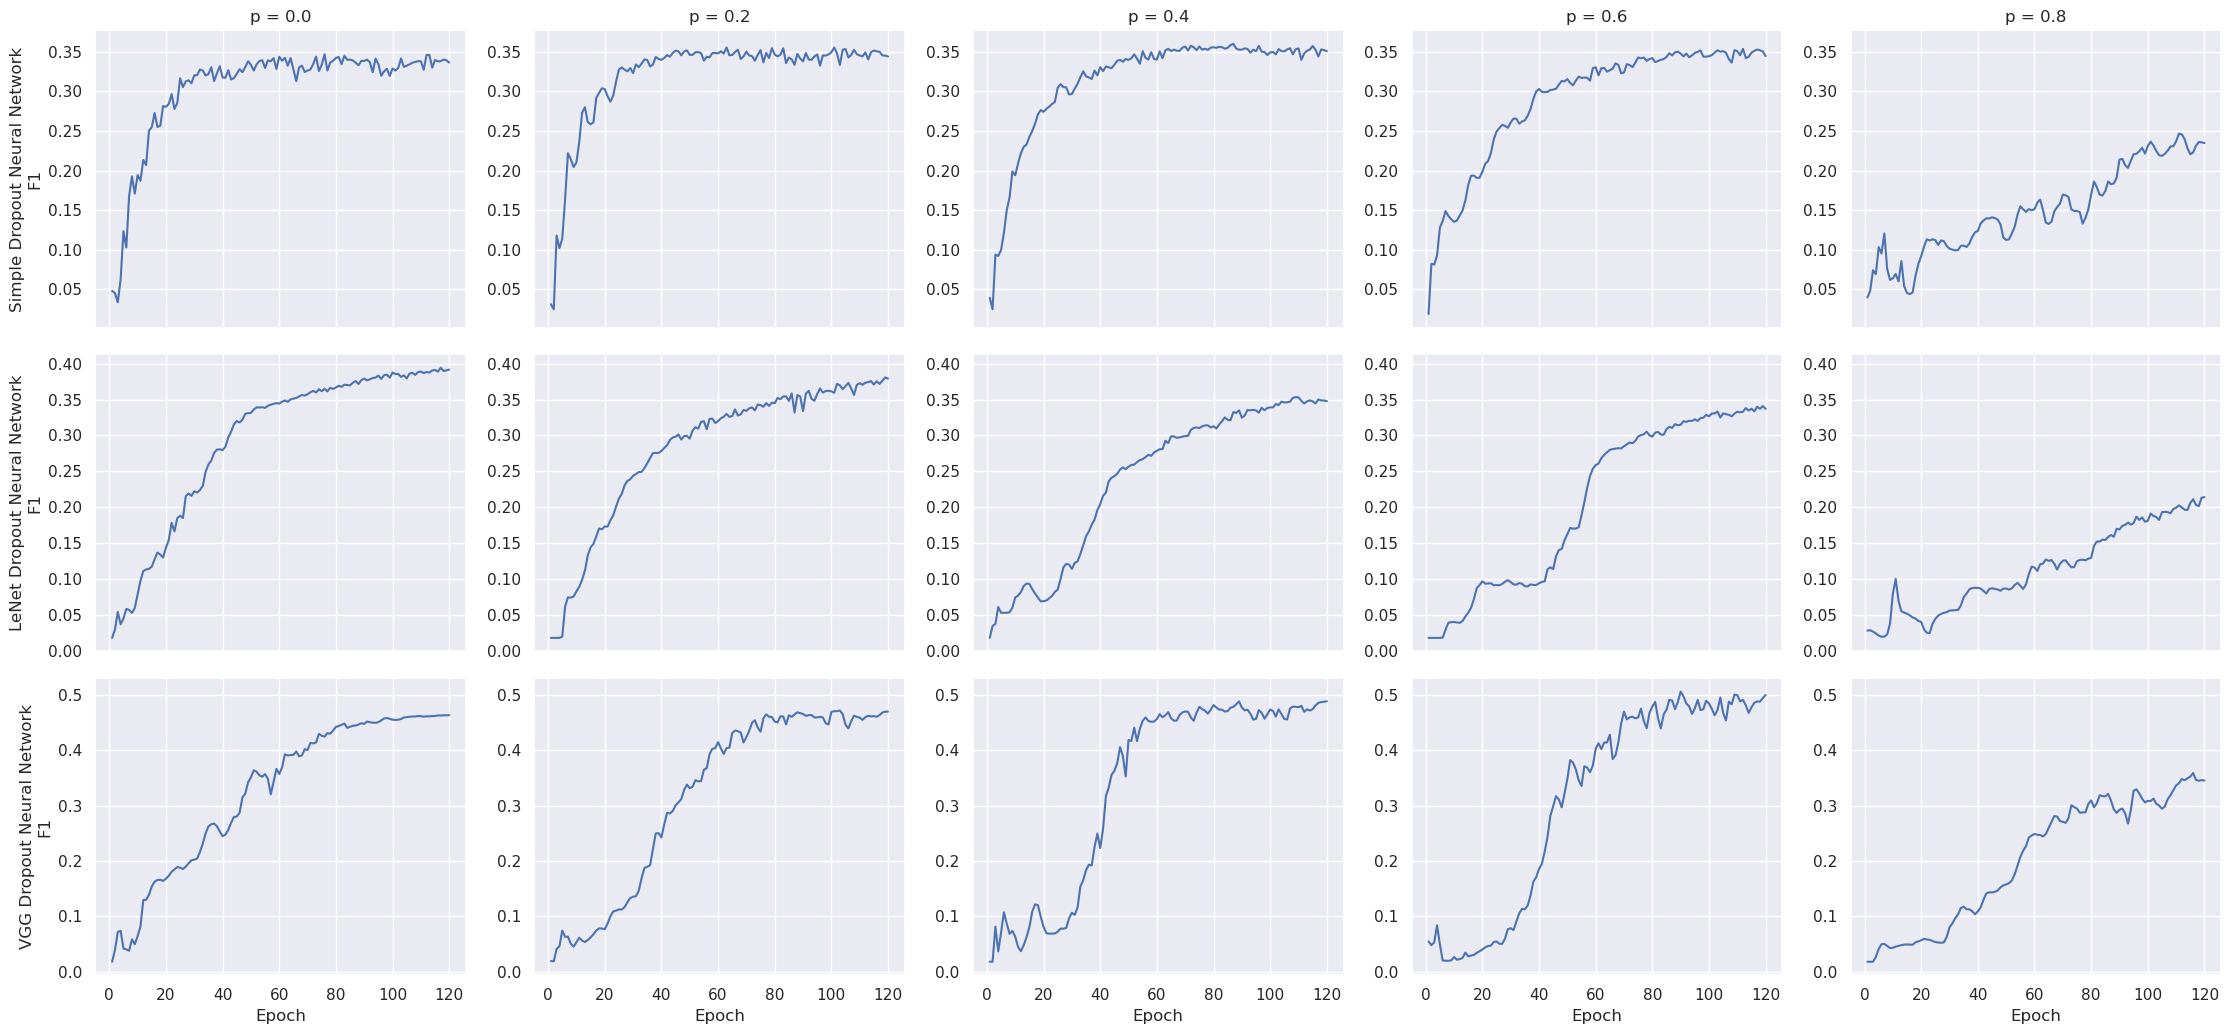

In [17]:
plot_dropout_histories(results_small, metric="f1")

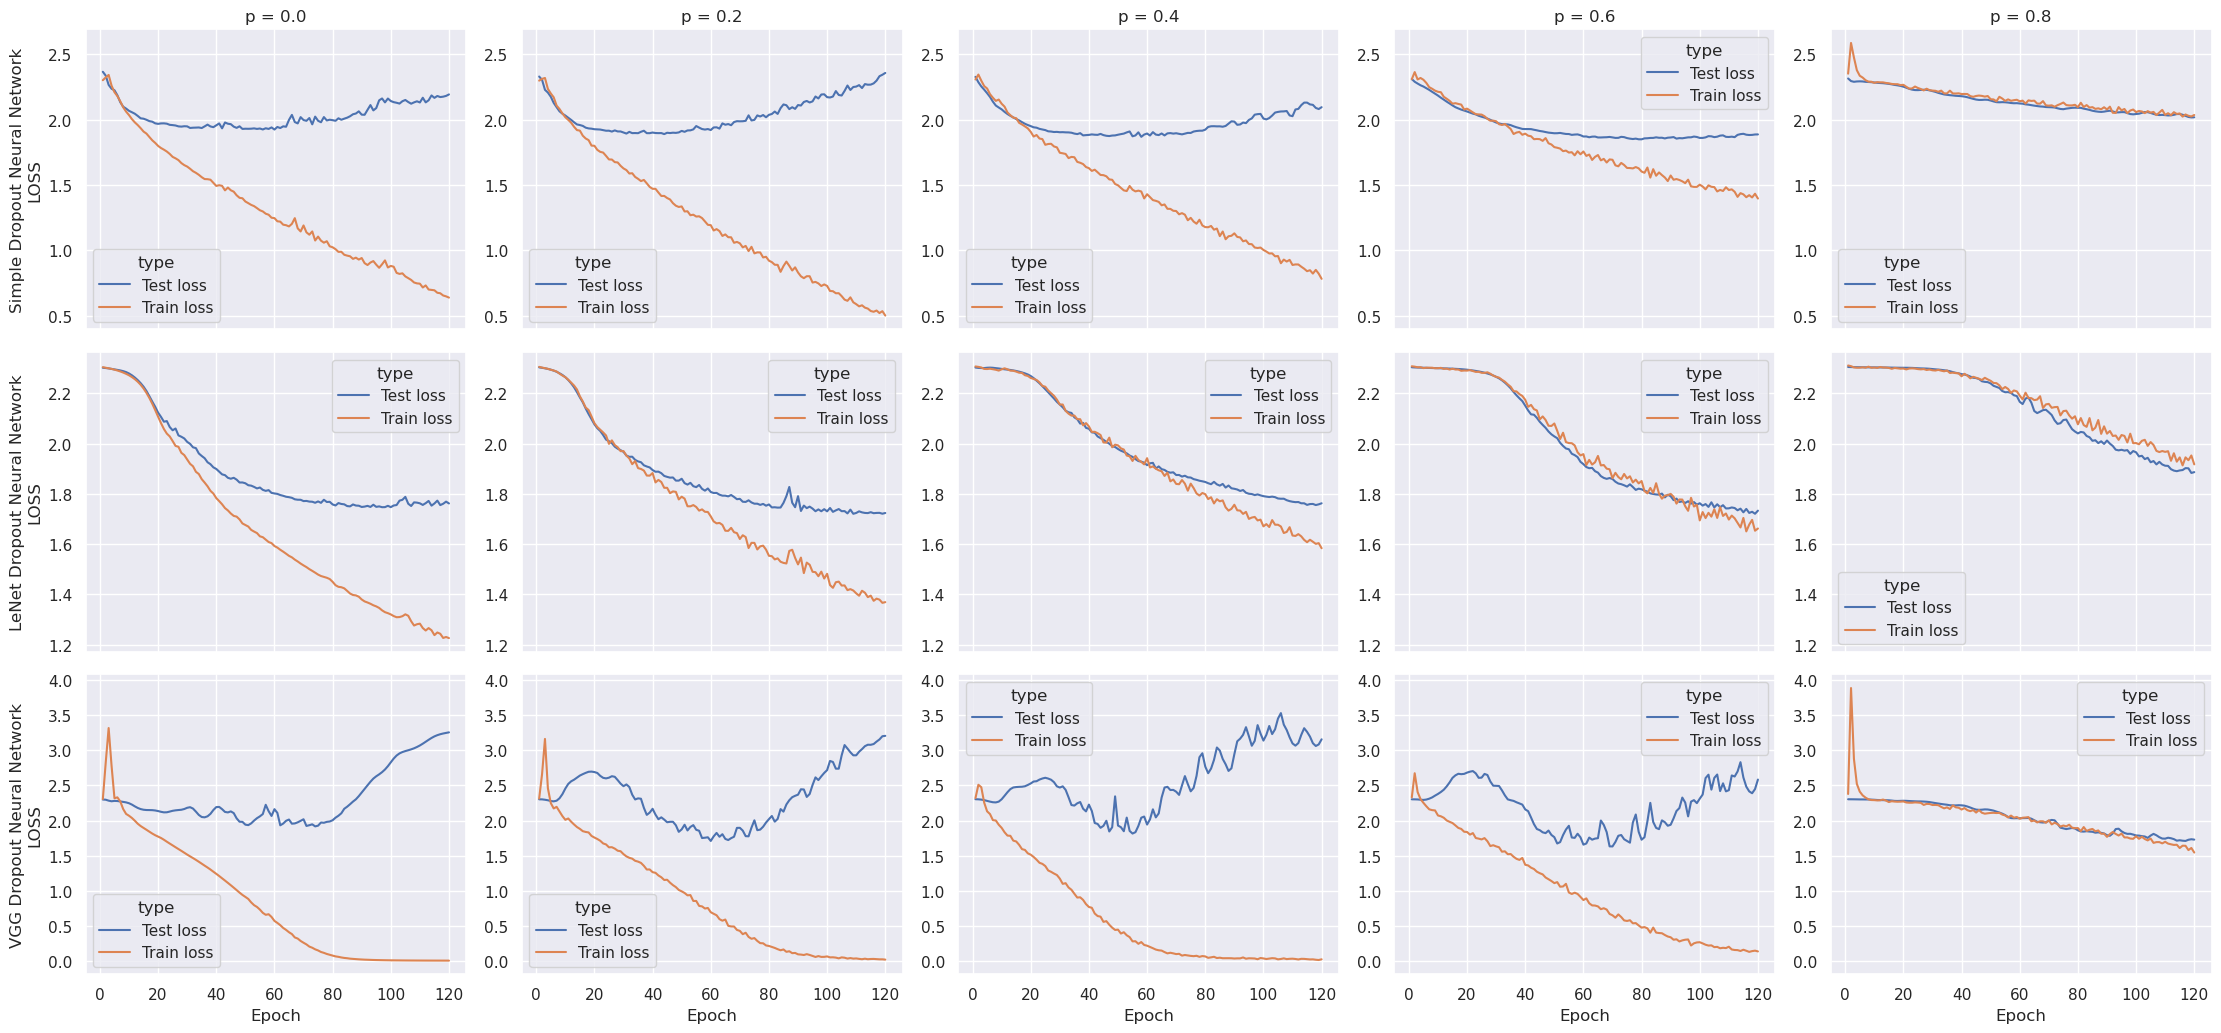

In [18]:
plot_dropout_histories(results_small, metric="loss")

#### É perceptível efeito de overfitting com a perca se tornando cada vez maior na Simple Neural Network, enquanto a LeNet, que usa convolução é mais robusta a overfitting. Assim, os modelos que mais se beneficiam são os que tendem ao overfitting. Dessa forma, é interessante analisar uma rede focada em overfitting:

In [19]:
from nn_models.overfitting import OverfittingProneNetwork

overfit_results = {}
for p in [0.0, 0.2, 0.4, 0.6]:
    print(f"\nTesting Dropout p={p}")
    model = OverfittingProneNetwork(dropout_rate=p, dropout_mode="inverted", input_channels=3, img_size=32).to(device)
    history = train_and_validate(model, train_loader, test_loader, epochs=200, max_norm=3.0)
    try:
        overfit_results[model.name][p] = history
    except:
        overfit_results[model.name] = {}
        overfit_results[model.name][p] = history


Testing Dropout p=0.0


Training model 'Overfitting-Prone Deep Network': 100%|██████████| 200/200 [03:13<00:00,  1.04it/s]


Finished in 193.11s

Testing Dropout p=0.2


Training model 'Overfitting-Prone Deep Network': 100%|██████████| 200/200 [03:33<00:00,  1.07s/it]


Finished in 213.17s

Testing Dropout p=0.4


Training model 'Overfitting-Prone Deep Network': 100%|██████████| 200/200 [03:35<00:00,  1.08s/it]


Finished in 215.25s

Testing Dropout p=0.6


Training model 'Overfitting-Prone Deep Network': 100%|██████████| 200/200 [03:31<00:00,  1.06s/it]

Finished in 211.97s


In [20]:
summarize_metrics(overfit_results)

,Model,Dropout Rate,Test Acc (%),F1 Score,Test Loss
0,Overfitting-Prone Deep Network,0.0000,49.8300,0.4970,5.5548
1,Overfitting-Prone Deep Network,0.2000,52.1900,0.5218,1.4905
2,Overfitting-Prone Deep Network,0.4000,50.4800,0.5060,1.4187
3,Overfitting-Prone Deep Network,0.6000,26.9600,0.2634,2.0275


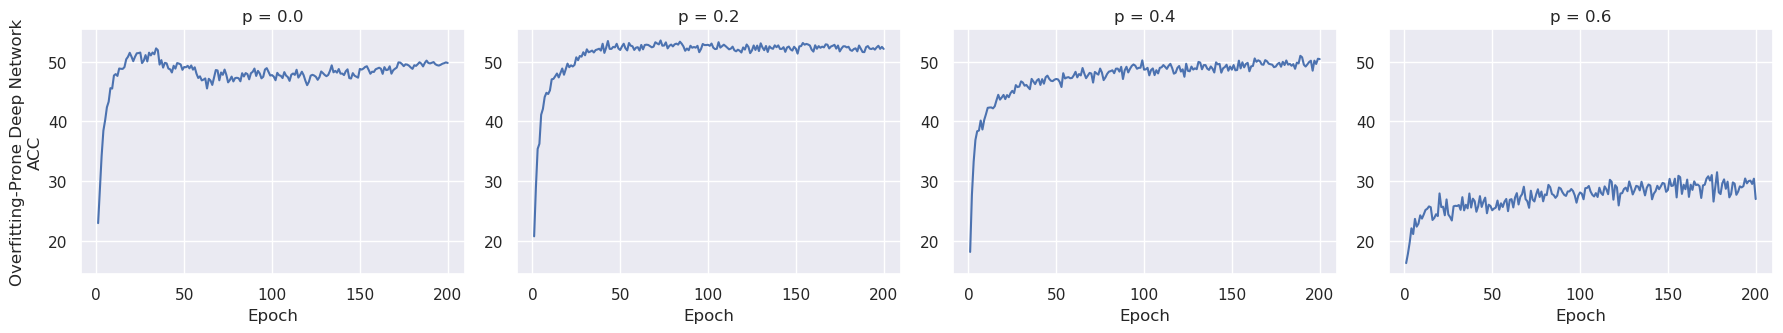

In [21]:
plot_dropout_histories(overfit_results, metric="acc")

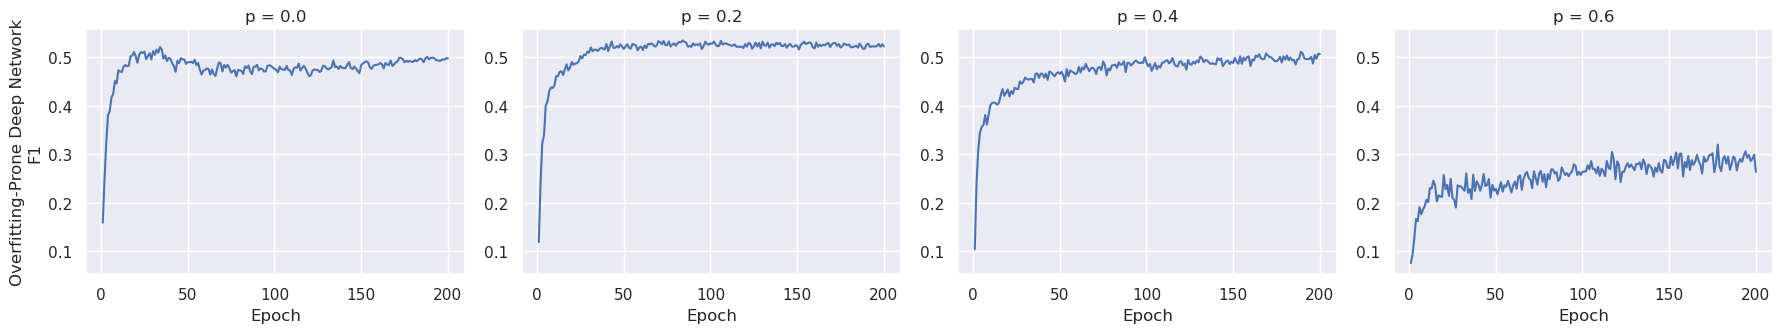

In [22]:
plot_dropout_histories(overfit_results, metric="f1")

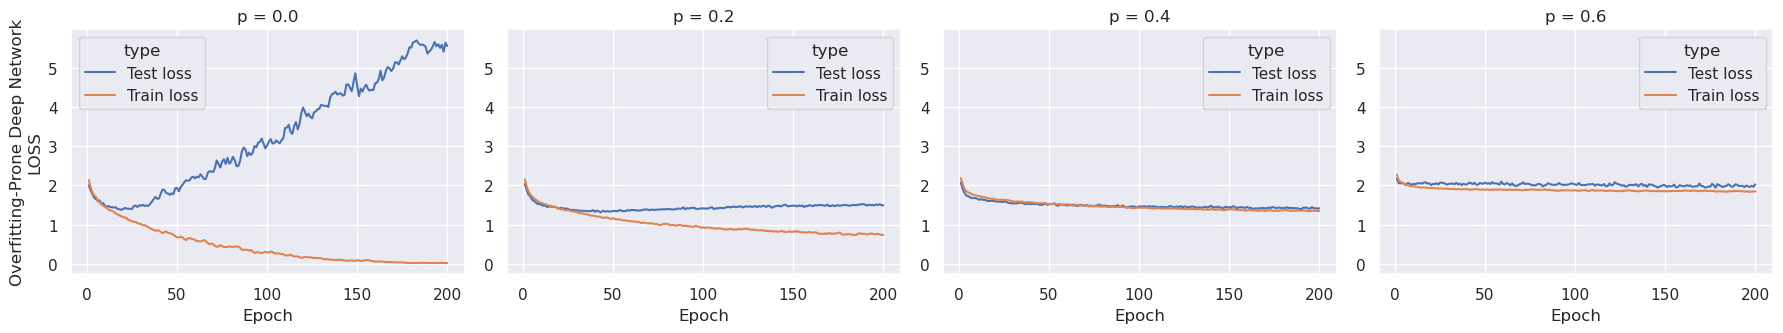

In [23]:
plot_dropout_histories(overfit_results, metric="loss")